In [5]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x=pd.read_csv("/content/Restaurant_Reviews.csv")

In [ ]:
x.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
x.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x["Review"],x["Liked"],test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(800,)
(200,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_train=tfidf.fit_transform(x_train)
tfidf_test=tfidf.transform(x_test)

print(tfidf_train)
print(tfidf_test)


  (0, 429)	0.25940809058174424
  (0, 136)	0.18804015619018394
  (0, 1727)	0.25940809058174424
  (0, 1756)	0.2057516498957871
  (0, 55)	0.1111516483831887
  (0, 812)	0.1546378055382699
  (0, 1067)	0.2755711594169779
  (0, 958)	0.27103674533101463
  (0, 1538)	0.09451939282709095
  (0, 1056)	0.20215623215703818
  (0, 813)	0.36441050468312847
  (0, 60)	0.28053804807904253
  (0, 91)	0.20700744288628697
  (0, 581)	0.36441050468312847
  (0, 1757)	0.23944925848957016
  (0, 1167)	0.3282886037557207
  (1, 1267)	0.2888619680291195
  (1, 1505)	0.3291059612360927
  (1, 1215)	0.6473813064559037
  (1, 1034)	0.3885458110824277
  (1, 810)	0.35871287735522367
  (1, 1150)	0.20111900715879666
  (1, 1555)	0.18694246855377059
  (1, 812)	0.18467906345055943
  (2, 988)	0.24241045192972205
  :	:
  (797, 1004)	0.16864556235435027
  (797, 604)	0.15585426817491024
  (797, 1756)	0.18625100776205006
  (797, 91)	0.18738777974001272
  (798, 1184)	0.43984909416698975
  (798, 793)	0.43984909416698975
  (798, 639)	0.309

In [ ]:
#support vector machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(tfidf_train,y_train)
pred=svm.predict(tfidf_test)
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.79

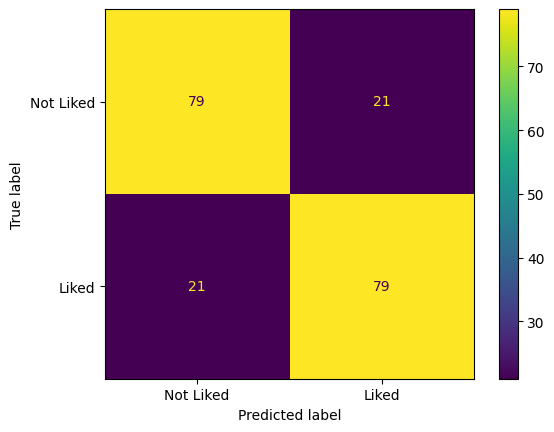

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, svm.predict(tfidf_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=["Not Liked","Liked"])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
nb=LogisticRegression()
nb.fit(tfidf_train,y_train)
pred=nb.predict(tfidf_test)
pred


array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
acc=accuracy_score(y_test,pred)
acc

0.78

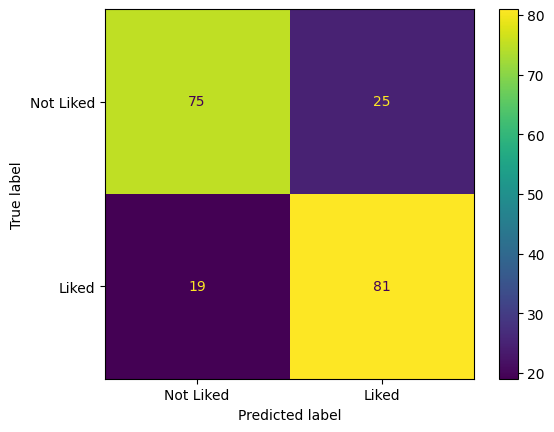

In [ ]:
cm = metrics.confusion_matrix(y_test, nb.predict(tfidf_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=["Not Liked","Liked"])

cm_display.plot()
plt.show()